🔍 Suspicious IPs (possible brute-force):
ip_address
192.168.0.10    12
192.168.0.19    12
192.168.0.3     12
192.168.0.11    11
172.16.5.2       9
172.16.5.7       8
192.168.0.18     8
192.168.0.5      8
192.168.0.17     8
172.16.5.10      8
192.168.0.15     8
192.168.0.7      7
192.168.0.8      6
192.168.0.2      6
172.16.5.4       6
172.16.5.9       6
192.168.0.14     6
172.16.5.5       6
172.16.5.1       6
192.168.0.6      6
172.16.5.6       6
192.168.0.9      5
192.168.0.20     5
192.168.0.13     5
172.16.5.8       5
192.168.0.4      5
192.168.0.16     4
Name: count, dtype: int64

🌙 Logins at unusual hours:
              timestamp username    ip_address   status
3   2025-11-08 03:55:00    guest    172.16.5.7   Failed
7   2025-11-08 01:38:00    guest  192.168.0.17  Success
11  2025-11-08 03:44:00   user02   192.168.0.8   Failed
19  2025-11-08 00:45:00    guest   192.168.0.5   Failed
20  2025-11-08 01:10:00   user03  192.168.0.11   Failed
..                  ...      ...           ..

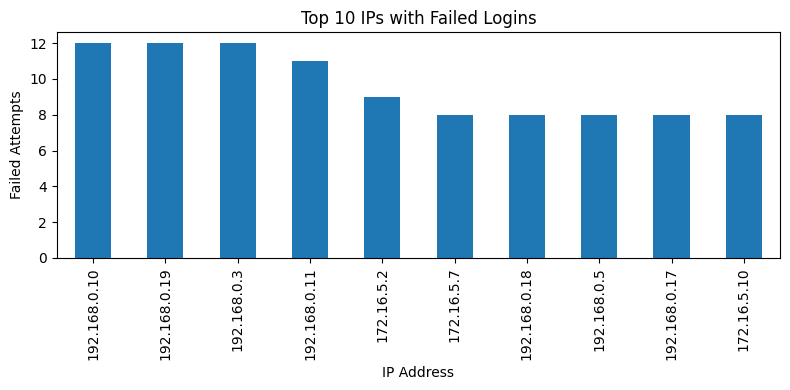

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv("server_logs.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].dt.hour

failed_logins = df[df['status'] == 'Failed']
suspicious_ips = failed_logins['ip_address'].value_counts()
suspicious_ips = suspicious_ips[suspicious_ips > 3]

print("🔍 Suspicious IPs (possible brute-force):")
print(suspicious_ips)

unusual_hours = df[df['hour'].between(0, 5)]
print("\n🌙 Logins at unusual hours:")
print(unusual_hours[['timestamp', 'username', 'ip_address', 'status']])

failed_logins['ip_address'].value_counts().head(10).plot(
    kind='bar', figsize=(8,4), title='Top 10 IPs with Failed Logins'
)
plt.xlabel('IP Address')
plt.ylabel('Failed Attempts')
plt.tight_layout()
plt.show()
